In [1]:
import pandas as pd
from PIL import Image 
import pytesseract
from PIL import ImageGrab
import numpy as np
import subprocess
from PIL import ImageGrab
import pytesseract
import pyautogui
import time
import matplotlib.pyplot as plt

from PIL import ImageFilter

ModuleNotFoundError: No module named 'pandas'

In [114]:
# leggere dati noisemeter automaticamente

In [40]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"


In [2]:

# apri applicazione Noi
subprocess.Popen(r"C:\Program Files (x86)\NoiseMeter\My Product Name\NoiseMeter\NoiseMeter.exe")
#close
time.sleep(1)



# Grab the screenshot of the specified area
screenshot = ImageGrab.grab()

#save screenshot
screenshot.save("screenshot.png")
# Perform OCR on the screenshot

import os
os.system("taskkill /f /im NoiseMeter.exe")

0

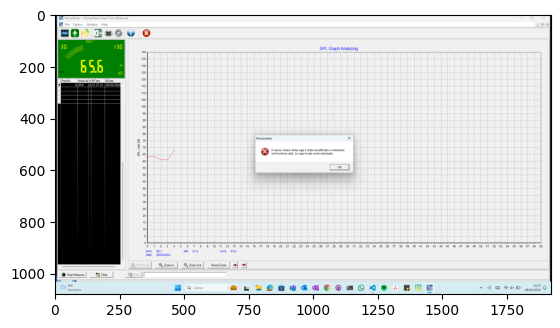

In [5]:
plt.imshow(screenshot)


In [6]:
# screenshot[100,200]

screenshot.getpixel((8,30))[1]

243

Found green square at 24, 118


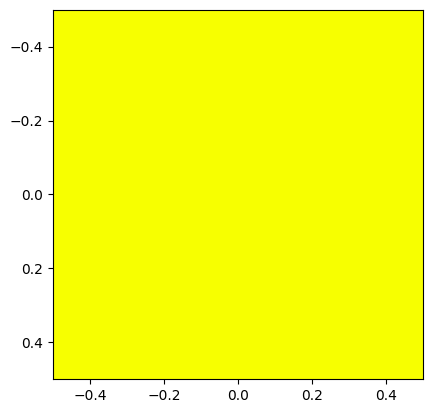

In [7]:
# cerca il quadrato più verde di dimensioni 0,200 0,200
quadratoSize = 1
for i in range(0, screenshot.size[0] - quadratoSize):
    for j in range(0, screenshot.size[1] - quadratoSize):
        if screenshot.getpixel((i, j))[1] == 255 and screenshot.getpixel((i, j))[2] == 0:
            print(f"Found green square at {i}, {j}")
            plt.imshow(screenshot.crop((i, j, i + quadratoSize, j + quadratoSize)))
            break
    else:
        continue
    break


In [14]:
####################
screenshot = Image.open("screenshot.png")

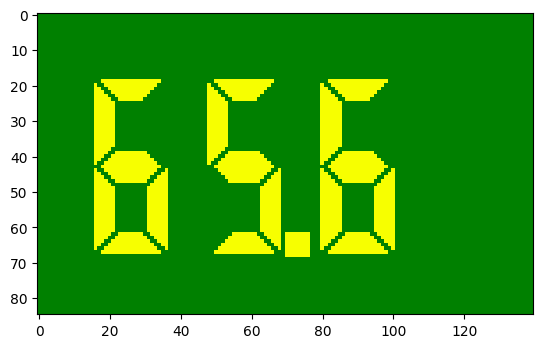

In [15]:
screenshot = screenshot.crop((i+60, j+40, i + 200, j + 125))
plt.imshow(screenshot)


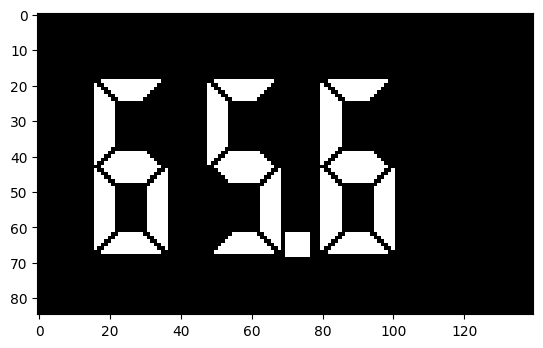

In [16]:
# applica filtro per migliorare la lettura del testo

# screenshot = screenshot.filter(ImageFilter.SHARPEN)
#bianco e nero
screenshot = screenshot.convert("L")
plt.imshow(screenshot, cmap="gray")

In [17]:
screen = np.array(screenshot)
image = screen.copy()

In [18]:
screen.shape

(85, 140)

In [19]:
for x in range(screen.shape[1]):
    for y in range(screen.shape[0]):
        if screen[y, x] > 100:
            screen[:, x] = 255
            break


for x in range(image.shape[0]):
    for y in range(image.shape[1]):
        if image[x, y] > 100:
            screen[x, :] = 255
            break

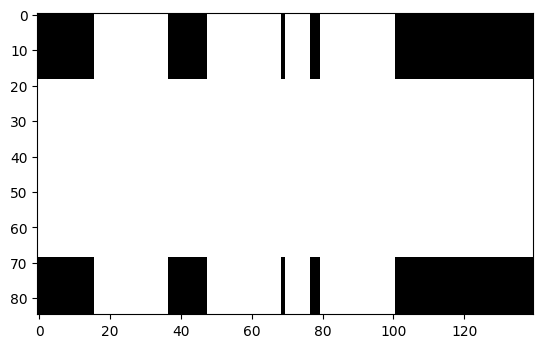

In [20]:
plt.imshow(screen, cmap="gray")

In [21]:
output_image = np.zeros_like(screen)

# Scansioniamo ogni pixel nell'immagine di input
for x in range(screen.shape[0]):
    for y in range(screen.shape[1]):
        # Controlliamo se tutta la riga e tutta la colonna all'indice del pixel sono uguali a 255
        if np.all(screen[x, :] == 255) and np.all(screen[:, y] == 255):
            # Se la condizione è vera, impostiamo solo il pixel corrente nell'immagine di output a 255 (bianco)
            output_image[x, y] = 255


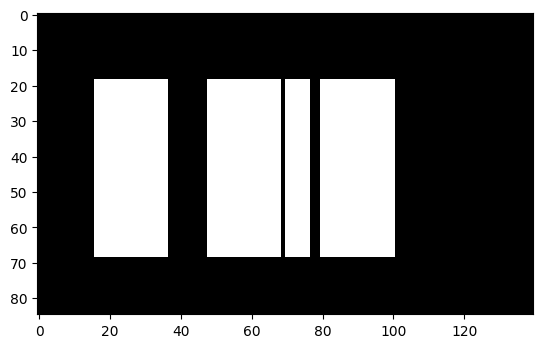

In [22]:
plt.imshow(output_image, cmap="gray")

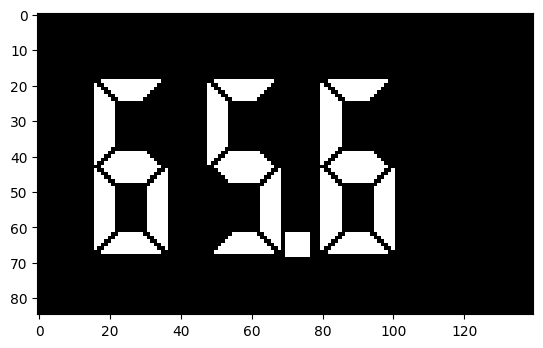

In [23]:
plt.imshow(image, cmap="gray")

In [24]:
def trova_buchi(array):
    buchi = []
    inizio_buco = None
    
    for i, elemento in enumerate(array):
        if elemento is None:
            if inizio_buco is None:
                inizio_buco = i
        elif inizio_buco is not None:
            buchi.append((inizio_buco, i - 1))
            inizio_buco = None
    
    if inizio_buco is not None:
        buchi.append((inizio_buco, len(array) - 1))
    
    return buchi


In [25]:
c = []
arrayvouto = []
tupla = (0,0)
for x in range(output_image.shape[1]):
    if np.sum(output_image[:,x]) > 0:
        c.append(None)
    else:
        c.append(c)
    
for x in range(output_image.shape[0]):
    if np.sum(output_image[x,:]) > 0:
        tupla = (x,0)
        break
for x in range(output_image.shape[0]-1,0,-1):
    if np.sum(output_image[x,:]) > 0:
        tupla = (tupla[0],x)
        break

buchi_trovati = trova_buchi(c)
buchi_trovati.pop(2)

print(tupla)
print(buchi_trovati)

(19, 68)
[(16, 36), (48, 68), (80, 100)]


In [26]:
def numero_buchi(lista_numero):
    if lista_numero == [True, True, True, True, True, True, False]:
        return 0
    if lista_numero == [False, True, True, False, False, False, False]:
        return 1
    if lista_numero == [True, True, False, True, True, False, True]:
        return 2
    if lista_numero == [True, True, True, True, False, False, True]:
        return 3
    if lista_numero == [False, True, True, False, False, True, True]:
        return 4
    if lista_numero == [True, False, True, True, False, True, True]:
        return 5
    if lista_numero == [True, False, True, True, True, True, True]:
        return 6
    if lista_numero == [True, True, True, False, False, False, False]:
        return 7
    if lista_numero == [True, True, True, True, True, True, True]:
        return 8
    if lista_numero == [True, True, True, True, False, True, True]:
        return 9
    

In [27]:
# listaNumeri = [(10,3), (2,10), (10, 17), (25,10), (35,3), (45,10), (35,17)]

listaNumeri = [(2,10), (10, 17), (35,17), (45,10), (35,3), (10,3), (25,10)]
numero = []
for i in range(len(buchi_trovati)):
    listas = []

    primoNumero = image[tupla[0]:tupla[1], buchi_trovati[i][0]:buchi_trovati[i][1]]
    for i in listaNumeri:
        if primoNumero[i] > 100:
            listas.append(True)
        else:
            listas.append(False)
    numero.append(numero_buchi(listas))
print(numero[0],numero[1],",",numero[2])

6 5 , 6


In [28]:
def trova_buchi(array):
    buchi = []
    inizio_buco = None
    
    for i, elemento in enumerate(array):
        if elemento is None:
            if inizio_buco is None:
                inizio_buco = i
        elif inizio_buco is not None:
            buchi.append((inizio_buco, i - 1))
            inizio_buco = None
    
    if inizio_buco is not None:
        buchi.append((inizio_buco, len(array) - 1))
    
    return buchi
def numero_buchi(lista_numero):
    if lista_numero == [True, True, True, True, True, True, False]:
        return 0
    if lista_numero == [False, True, True, False, False, False, False]:
        return 1
    if lista_numero == [True, True, False, True, True, False, True]:
        return 2
    if lista_numero == [True, True, True, True, False, False, True]:
        return 3
    if lista_numero == [False, True, True, False, False, True, True]:
        return 4
    if lista_numero == [True, False, True, True, False, True, True]:
        return 5
    if lista_numero == [True, False, True, True, True, True, True]:
        return 6
    if lista_numero == [True, True, True, False, False, False, False]:
        return 7
    if lista_numero == [True, True, True, True, True, True, True]:
        return 8
    if lista_numero == [True, True, True, True, False, True, True]:
        return 9
    
def main():
    while True:
        try: 
            screenshot = ImageGrab.grab()
            # cerca il quadrato più verde di dimensioni 0,200 0,200
            quadratoSize = 1
            for i in range(0, screenshot.size[0] - quadratoSize):
                for j in range(0, screenshot.size[1] - quadratoSize):
                    if screenshot.getpixel((i, j))[1] == 255 and screenshot.getpixel((i, j))[2] == 0:
                        
                        break
                else:
                    continue
                break
            
            screenshot = screenshot.crop((i+60, j+40, i + 200, j + 125))
            screenshot = screenshot.convert("L")
            screen = np.array(screenshot)
            for x in range(screen.shape[1]):
                for y in range(screen.shape[0]):
                    if screen[y, x] > 100:
                        screen[:, x] = 255
                        break


            for x in range(image.shape[0]):
                for y in range(image.shape[1]):
                    if image[x, y] > 100:
                        screen[x, :] = 255
                        break
            
            output_image = np.zeros_like(screen)

            # Scansioniamo ogni pixel nell'immagine di input
            for x in range(screen.shape[0]):
                for y in range(screen.shape[1]):
                    # Controlliamo se tutta la riga e tutta la colonna all'indice del pixel sono uguali a 255
                    if np.all(screen[x, :] == 255) and np.all(screen[:, y] == 255):
                        # Se la condizione è vera, impostiamo solo il pixel corrente nell'immagine di output a 255 (bianco)
                        output_image[x, y] = 255
            c = []
            tupla = (0,0)
            for x in range(output_image.shape[1]):
                if np.sum(output_image[:,x]) > 0:
                    c.append(None)
                else:
                    c.append(c)
                
            for x in range(output_image.shape[0]):
                if np.sum(output_image[x,:]) > 0:
                    tupla = (x,0)
                    break
            for x in range(output_image.shape[0]-1,0,-1):
                if np.sum(output_image[x,:]) > 0:
                    tupla = (tupla[0],x)
                    break

            buchi_trovati = trova_buchi(c)
            buchi_trovati.pop(2)

            # listaNumeri = [(10,3), (2,10), (10, 17), (25,10), (35,3), (45,10), (35,17)]

            listaNumeri = [(2,10), (10, 17), (35,17), (45,10), (35,3), (10,3), (25,10)]
            numero = []
            for i in range(len(buchi_trovati)):
                listas = []

                primoNumero = image[tupla[0]:tupla[1], buchi_trovati[i][0]:buchi_trovati[i][1]]
                for i in listaNumeri:
                    if primoNumero[i] > 100:
                        listas.append(True)
                    else:
                        listas.append(False)
                numero.append(numero_buchi(listas))
            print(numero[0],numero[1],",",numero[2])
        except Exception as e:
            print("errore: ", e)

In [33]:
main()

Found green square at 24, 118
6 5 , 6
Found green square at 24, 118
6 5 , 6
Found green square at 24, 118
6 5 , 6
Found green square at 24, 118
6 5 , 6
Found green square at 24, 118
6 5 , 6
Found green square at 24, 118
6 5 , 6
Found green square at 24, 118
6 5 , 6
Found green square at 24, 118
6 5 , 6
Found green square at 24, 118
6 5 , 6
Found green square at 24, 118
6 5 , 6
Found green square at 24, 118
6 5 , 6
Found green square at 24, 118
6 5 , 6
Found green square at 24, 118
6 5 , 6
Found green square at 24, 118
6 5 , 6
Found green square at 24, 118
6 5 , 6
Found green square at 24, 118
6 5 , 6
Found green square at 24, 118
6 5 , 6
Found green square at 24, 118
6 5 , 6
Found green square at 24, 118
6 5 , 6
Found green square at 24, 118
6 5 , 6
Found green square at 24, 118
6 5 , 6
Found green square at 24, 118
6 5 , 6
Found green square at 24, 118
6 5 , 6
Found green square at 24, 118
6 5 , 6
Found green square at 24, 118
6 5 , 6
Found green square at 24, 118
6 5 , 6
Found green 

KeyboardInterrupt: 

In [2]:
int(4.5)+1.1

5.1